Index number : 190026T

Name         : AHAMED M.I.I

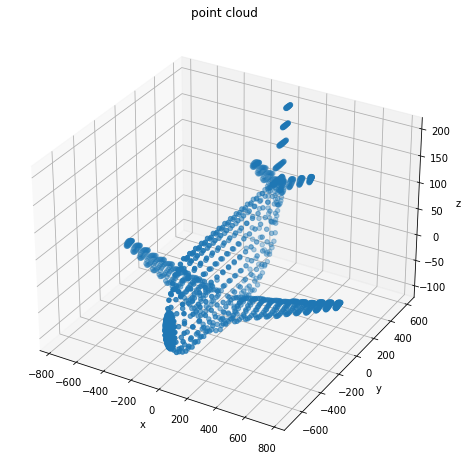

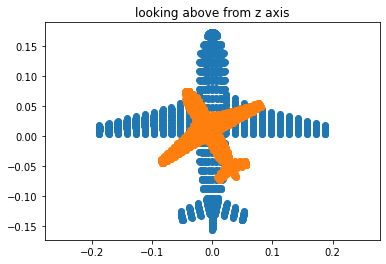

In [1]:
#1)

import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
from plyfile import PlyData

pcd = PlyData.read(r'E:\Aca\aca sem 4\Image Processing & Machine vision\exercises\exercise_07\airplane.ply')
assert pcd is not None

points = np.concatenate((pcd['vertex']['x'].reshape(1, -1), pcd['vertex']['y'].reshape(1, -1), pcd['vertex']['z'].reshape(1, -1)), axis=0)
points = points - np.mean(points, axis=1).reshape(3, 1)

fig, ax = plt.subplots(subplot_kw={"projection": "3d"}, figsize=(8,8))
ax.title.set_text('point cloud')
ax.scatter(points[0,:], points[1,:], points[2,:])
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z');

ones = np.ones((1, points.shape[1]))
X = np.concatenate((points, ones), axis=0)

R = np.array([[1, 0, 0],
              [0, 1, 0],
              [0, 0, 1]])
K = np.array([[1, 0, 0],
              [0, 1, 0],
              [0, 0, 1]])
t = np.array([[0],
              [0],
              [-4000]])

P1 = K @ np.concatenate((R, t), axis=1)

R = np.array([[np.cos(np.pi/6), -np.sin(np.pi/6), 0],
              [np.sin(np.pi/6), np.cos(np.pi/6), 0],
              [0, 0, 1]])
K = np.array([[0.5, 0, 0],
              [0, 0.5, 0],
              [0, 0, 1]])
t = np.array([[0],
              [0],
              [-4000]])

P2 = K @ np.concatenate((R, t), axis=1)

x1 = P1 @ X
x1 = x1/x1[2,:]

x2 = P2 @ X
x2 = x2/x2[2,:]

fig,ax=plt.subplots(1,1,sharex=True,sharey=True)
ax.scatter(x1[0,:],x1[1,:])
ax.scatter(x2[0,:],x2[1,:])
ax.axis("equal")
ax.set_title("looking above from z axis")
plt.show()


Items 1 , area in pixels = 59143
Items 1 , area in mn^2 = 2318.642172
Items 2 , area in pixels = 59211
Items 2 , area in mn^2 = 2321.3080440000003


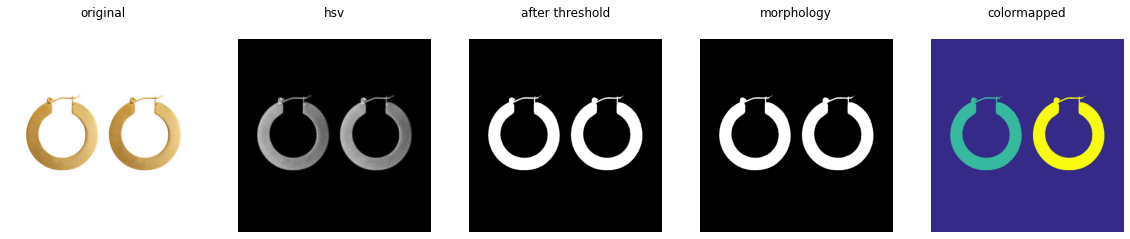

In [2]:
#3)

earring = cv.imread(r'E:\Aca\aca sem 4\Image Processing & Machine vision\exercises\exercise_07\earrings.jpg', cv.IMREAD_COLOR)
assert earring is not None

hsv = cv.cvtColor(earring, cv.COLOR_BGR2HSV)
th, bw = cv.threshold(hsv[:, :, 1], 0, 255, cv.THRESH_BINARY + cv.THRESH_OTSU) 

w = 5
kernel = np.ones((w, w), np.uint8)
opened = cv.morphologyEx(bw, cv.MORPH_CLOSE, kernel)

retval, labels, stats, centroids = cv.connectedComponentsWithStats(bw)
colormapped = cv.applyColorMap((labels/np.amax(labels)*255).astype('uint8'), cv.COLORMAP_PARULA)

Z=720
f=8
for i,s in enumerate(stats):
    if i!=0:
        print("Items",i,", area in pixels =",s[4])
        print("Items",i,", area in mn^2 =",s[4]*(2.2e-3)**2*(Z*Z)/(f*f))

fig, ax = plt.subplots(1, 5, figsize=(20, 4))
ax[0].imshow(cv.cvtColor(earring, cv.COLOR_BGR2RGB))
ax[0].title.set_text('original')
ax[0].axis('off')
ax[0].xaxis.tick_top()

ax[1].imshow(cv.cvtColor(hsv[:, :, 1], cv.COLOR_BGR2RGB))
ax[1].title.set_text('hsv')
ax[1].axis('off')
ax[1].xaxis.tick_top()

ax[2].imshow(cv.cvtColor(bw, cv.COLOR_BGR2RGB))
ax[2].title.set_text('after threshold')
ax[2].axis('off')
ax[2].xaxis.tick_top()

ax[3].imshow(cv.cvtColor(opened, cv.COLOR_BGR2RGB))
ax[3].title.set_text('morphology')
ax[3].axis('off')
ax[3].xaxis.tick_top()

ax[4].imshow(cv.cvtColor(colormapped, cv.COLOR_BGR2RGB))
ax[4].title.set_text('colormapped')
ax[4].axis('off')
ax[4].xaxis.tick_top()

(147, 296, 64, 32)


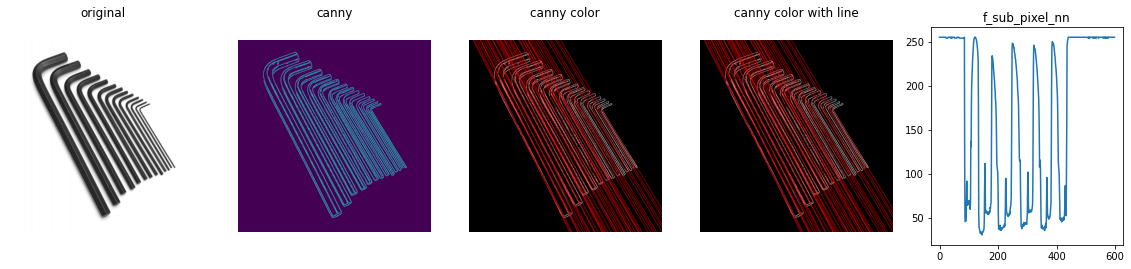

In [10]:
#4)

im = cv.imread(r'E:\Aca\aca sem 4\Image Processing & Machine vision\exercises\exercise_07\allenkeys.jpg', cv.IMREAD_REDUCED_GRAYSCALE_2)
assert im is not None

canny = cv .Canny(im, 50, 150)

# Copy edges to the images that will display the results in BGR
canny_color = cv . cvtColor ( canny , cv .COLOR_GRAY2BGR)

lines = cv . HoughLines ( canny , 1 , np . pi / 180 , 170 , None , 0 , 0)
if lines is not None :
    for i in range (0 , len (lines)):
        rho = lines[i][0][0]
        theta = lines[i][0][1]
        a = np.cos(theta)
        b = np.sin(theta )
        x0 = a*rho
        y0 = b*rho
        pt1 = (int(x0 + 1000*(-b)) , int(y0 + 1000*(a)))
        pt2 = (int(x0 - 1000*(-b)) , int(y0 - 1000*(a)))
        cv.line(canny_color , pt1 , pt2 , (0 ,0 ,255) , 1 , cv.LINE_AA)

fig, ax = plt.subplots(1, 5, figsize=(20, 4))
ax[0].imshow(im, cmap = 'gray', vmin =0, vmax=255)
ax[0].title.set_text('original')
ax[0].axis('off')
ax[0].xaxis.tick_top()

ax[1].imshow(canny)
ax[1].title.set_text('canny')
ax[1].axis('off')
ax[1].xaxis.tick_top()

ax[2].imshow(cv.cvtColor(canny_color, cv.COLOR_BGR2RGB))
ax[2].title.set_text('canny color')
ax[2].axis('off')
ax[2].xaxis.tick_top()

cv.namedWindow( 'Image' , cv.WINDOW_AUTOSIZE)
cv.imshow( 'Image' , im)
cv.waitKey(0)
cv.imshow( 'Image' , canny )
cv.waitKey(0)

cv.imshow('Image' , canny_color )
r = cv.selectROI('Image' , canny_color , showCrosshair = True , fromCenter =False)
cv.waitKey(0)
cv.destroyAllWindows()
print(r)

x0 , y0 = int (r[0] +r[2]/2) , int(r[1]+r[3]/2)
m = b/a # Gradient
m = np.tan(np.median(lines[ : , 0 ,1]))
c = y0 = m*x0 # Inte r cept

cv.line(canny_color, (0 , int(c)) , (im.shape[0] , int(m*im.shape[0] +  c )) , (0 ,255 ,0) , 2 , cv.LINE_AA)

ax[3].imshow(cv.cvtColor(canny_color, cv.COLOR_BGR2RGB))
ax[3].title.set_text('canny color with line')
ax[3].axis('off')
ax[3].xaxis.tick_top()

dy = 1
y_sub_pixel = np.arange(0 , im.shape[0] - 1 , dy )
f_sub_pixel = np.zeros_like(y_sub_pixel)
f_sub_pixel_nn = np.zeros_like(y_sub_pixel)
# https://youtu.be/v9CFu4r6tPY

for i , y in enumerate(y_sub_pixel):
    f_sub_pixel_nn[i] = im[i,y]
    # # Your code hear to generate the pixel values along the line


ax[4].plot(f_sub_pixel_nn )
ax[4].title.set_text('f_sub_pixel_nn')
#Your code hear to compute the widths . Keep in mind of the angle.